# Groceries: Customer Segmentation

The aim of this project is to apply several unsupervised learning techniques on a dataset containing data about various customers' annual spendings on different product categories like fresh, frozen, etc. The goal is to describe the variation of the different type of customers, i.e. identify the customers. By doing this, a potential supermarket could better structure it's distribution system for example. 


The data is a public dataset obtained from [UCI website](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). The data concerns customer data in Portugual. I did this project pure for interest since I have been grown up in a retail business and are curious about the possibilities data can discover. Let's start by importing relevant libraries.

In [40]:
# Analysis
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set(font='times new roman',font_scale=1,palette='Greens')

# Initial data exploration

Now, I would like to import the data and get familiar with it. 

In [41]:
spendings = pd.read_csv("Wholesale customers data.csv")
spendings.head()
spendings['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

We see that we have a row of data for each customer. Every row contains the channel and region the customer uses and lives in. Further, all annual spending in the local monutary unit (let's just assume Euros €) for each product category.

Here are the descriptions of the UCI website:

1) FRESH: annual spending (m.u.) on fresh products;

2) MILK: annual spending (m.u.) on milk products;

3) GROCERY: annual spending (m.u.) on grocery products;

4) FROZEN: annual spending (m.u.) on frozen products;

5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products;

6) DELICATESSEN: annual spending (m.u.) on and delicatessen products;

7) CHANNEL: customer Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel;

8) REGION: customerer Region Lisbon, Porto or Other (Nominal).

I do want to exclude the latter two since I want to predict the customers purely focus on product categories: 

In [42]:
channels = spendings['Channel'].apply(lambda x: x-1)
spendings.drop(['Region', 'Channel'], axis = 1, inplace = True)
channels

0      1
1      1
2      1
3      0
4      1
      ..
435    0
436    0
437    1
438    0
439    0
Name: Channel, Length: 440, dtype: int64

In [43]:
spendings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


The whole dataset is nicely filled with integers. Let's see how they behave.

In [44]:
spendings.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Based on the mean values I can identify three categories of spendings:
    - High spendings (Fresh + Grocery + Milk)
    - Medium spendings (Frozen + Paper)
    - Low spendings (Delicassen)

### KDE's 
What is remarkable is that the variance has the has the same order of magitude compared to the mean. This implies that some customers do but a lot in one category and much much less in the others. Let's consider their distributions":

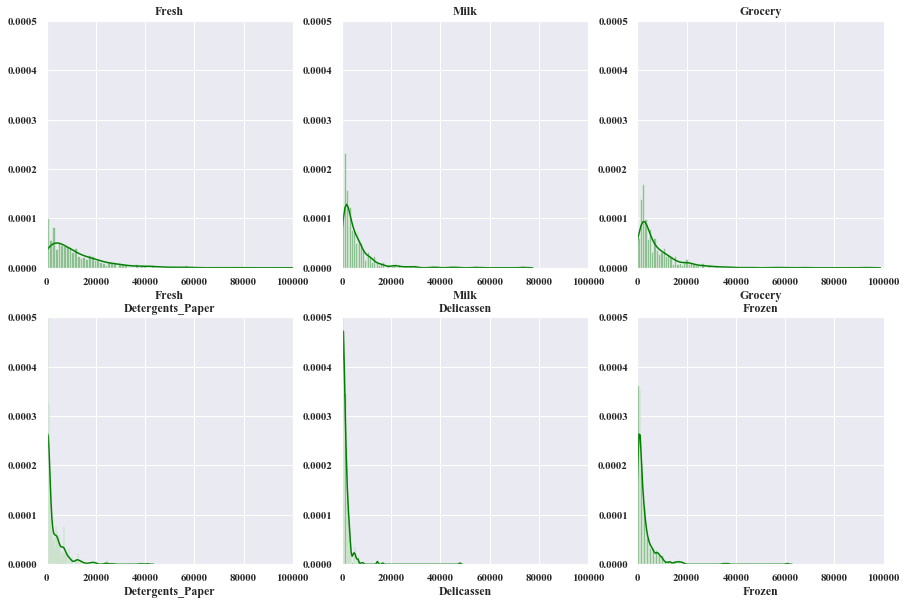

In [45]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
row=0
col=0
Products = spendings.columns
for Product in Products:
    sns.distplot(spendings[Product],color='green',bins=100,ax=axes[row][col])
    axes[row][col].set_title(Product)
    axes[row][col].set_xlim([0, 100000])
    axes[row][col].set_ylim([0,0.0005])
    

    if col==2:
        col-=3
        row+=1
    else:
        col+=1

This is interesting, it can be seen that in some product classes some larger buyers are present. It could be that hotels or restaurant buy larger quantities of course. For the rest, in more consumer based segments, like fresh, milk and groceries we see that the distribution is much more spread. After having scaled this data, let's search for a couple of examples of these segments! 

## Variable scalings

For financial data with a high skew what is discovered about, applying a non-linear function would be good for normalisation. Normally, a natural logarithm is a good choice. One can also choose a Box-Cox transformation (https://en.wikipedia.org/wiki/Power_transform). Let's try both:

In [46]:
from scipy.stats import boxcox

In [47]:
spendings_log = spendings.apply(lambda x: np.log(x))
spendings_boxcox = spendings.apply(lambda x: boxcox(x))
type(spendings_boxcox)


pandas.core.series.Series

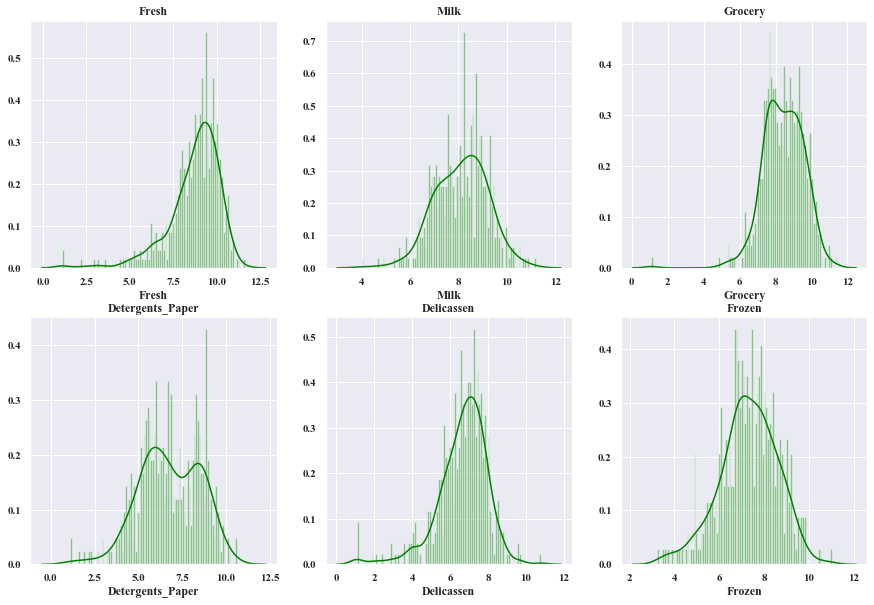

In [48]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
row=0
col=0
Products = spendings.columns
for Product in Products:
    sns.distplot(spendings_log[Product],color='green',bins=100,ax=axes[row][col])
    axes[row][col].set_title(Product)
    #axes[row][col].set_xlim([0, 100000])
    #axes[row][col].set_ylim([0,0.0005])
    

    if col==2:
        col-=3
        row+=1
    else:
        col+=1

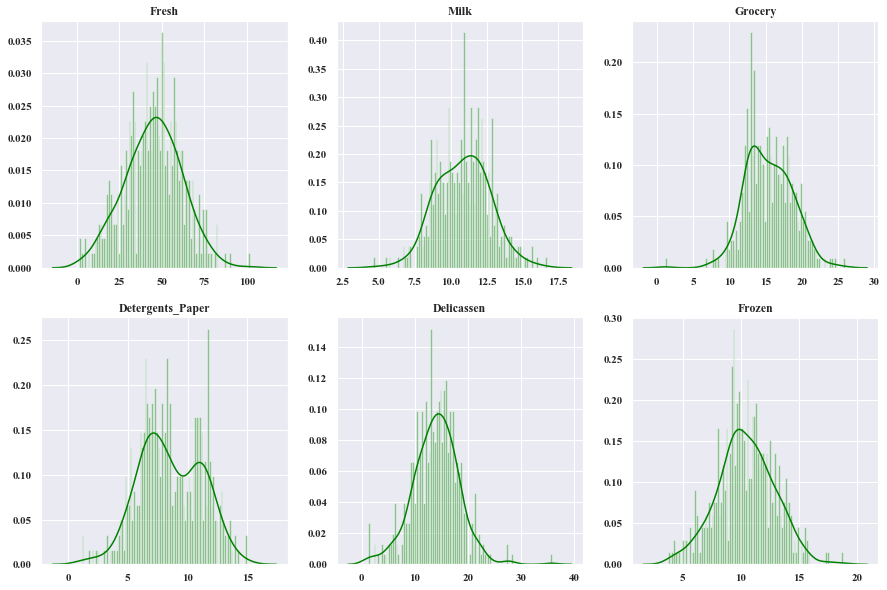

In [49]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(15,10))
row=0
col=0
for Product in Products:
    sns.distplot(spendings_boxcox[Product][0],color='green',bins=100,ax=axes[row][col])
    axes[row][col].set_title(Product)
    #axes[row][col].set_xlim([0, 100000])
    #axes[row][col].set_ylim([0,0.0005])
    

    if col==2:
        col-=3
        row+=1
    else:
        col+=1

These distributions behave better. I will proceed with the latter distributions in a bit. First, let's reconsider the note I made earlier about the kind of customers.

Let's first write a data-frame which presents the % of spendings per category per consumer.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,12669,9656,7561,214,2674,1338,34112
1,7057,9810,9568,1762,3293,1776,33266
2,6353,8808,7684,2405,3516,7844,36610
3,13265,1196,4221,6404,507,1788,27381
4,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,73302
436,39228,1431,764,4510,93,2346,48372
437,14531,15488,30243,437,14841,1867,77407
438,10290,1981,2232,1038,168,2125,17834


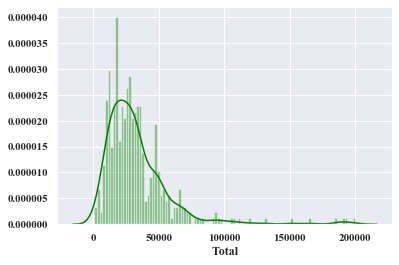

In [50]:
spendings['Total']=spendings.sum(axis=1)
spendings['Total'].describe()

plt.figure()
sns.distplot(spendings['Total'],color='green',bins=100)
spendings

We see that we have a couple of very large spenders. But the majority are average spenders.

### Guess of customer segments

Now let's consider a couple individual ones. 



In [51]:
spendings_relative=pd.DataFrame()
#Products=['Fresh']
for Product in Products:
    spendings_relative[Product]=round(spendings[Product]/spendings['Total']*100)
spendings_relative.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,37.497727,16.740909,22.977273,10.586364,7.404545,4.750000
std,24.841273,11.316775,14.627787,11.316599,8.078486,4.354062
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,8.000000,11.000000,3.000000,1.000000,2.000000
50%,37.000000,14.000000,21.000000,7.000000,3.000000,4.000000
75%,58.000000,24.000000,33.000000,15.000000,13.000000,6.000000
max,95.000000,63.000000,74.000000,66.000000,53.000000,31.000000


Relatively speaking, most purchases are fresh foods. We of course see the same order of magnitude in the variances as seen previously. Now, let's see whether we can identify some of the customer categories by means of an exploritory analysis:

In [52]:
print('Table 1')
spendings_relative.sort_values('Fresh',ascending=False).iloc[10:20]

Table 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
262,82.0,5.0,6.0,3.0,2.0,2.0
436,81.0,3.0,2.0,9.0,0.0,5.0
32,79.0,5.0,11.0,1.0,3.0,1.0
247,79.0,2.0,3.0,12.0,0.0,4.0
54,79.0,4.0,6.0,7.0,1.0,4.0
39,79.0,1.0,1.0,14.0,0.0,4.0
122,79.0,1.0,2.0,13.0,0.0,6.0
232,78.0,5.0,12.0,2.0,1.0,3.0
380,78.0,3.0,6.0,11.0,2.0,1.0
368,78.0,4.0,8.0,7.0,0.0,2.0


In [53]:
print('Table 2')
spendings_relative.sort_values('Grocery',ascending=False).iloc[10:20]

Table 2


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
353,0.0,17.0,56.0,1.0,23.0,3.0
96,0.0,17.0,54.0,1.0,26.0,1.0
266,1.0,23.0,53.0,5.0,12.0,6.0
418,2.0,24.0,53.0,0.0,19.0,2.0
43,1.0,24.0,52.0,2.0,21.0,0.0
216,4.0,24.0,52.0,0.0,19.0,1.0
304,0.0,16.0,52.0,1.0,25.0,5.0
343,3.0,13.0,51.0,3.0,30.0,0.0
160,7.0,14.0,50.0,3.0,17.0,8.0
379,20.0,25.0,50.0,1.0,4.0,1.0


In [54]:
print('Table 3')
spendings_relative.sort_values('Milk',ascending=False).iloc[10:20]

Table 3


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
235,13.0,46.0,21.0,9.0,9.0,2.0
271,18.0,44.0,14.0,10.0,1.0,14.0
392,5.0,43.0,37.0,7.0,1.0,7.0
275,18.0,42.0,6.0,22.0,2.0,10.0
254,24.0,42.0,11.0,11.0,4.0,8.0
171,0.0,42.0,32.0,1.0,14.0,10.0
265,10.0,41.0,24.0,18.0,1.0,6.0
315,4.0,41.0,33.0,2.0,11.0,10.0
108,7.0,40.0,33.0,1.0,12.0,6.0
320,19.0,39.0,24.0,5.0,3.0,9.0


We can identify several categories:
1. Customers who primarlity buy fresh foods (In the order of 80-90% of their total purchases). This might be local fresh food stores like a green grocer.
2. Customers who buy relatively a lot milk also purchase quite a lot of groceries and fresh. These could be cafes who are also serving sandwiches for example. 
3. Customers who buy a lot of groceries appear to buy a lot of detergents as well. This might be a category as well but I can not think of a specific example.

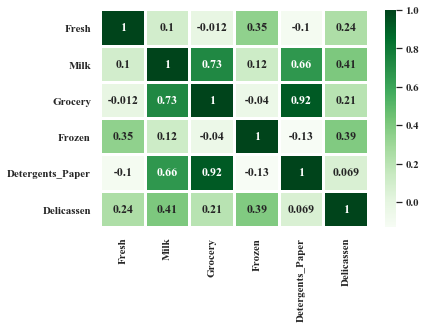

In [55]:
spendings_corr = spendings.drop('Total',axis=1).corr()
sns.heatmap(spendings_corr,annot=True,linewidths=2,cmap='Greens')


This heatmap verifies what was noticed above.

### Feature relevance

If these categories exist can we also predict the outcome of one feature based on the others? This is already a step in the direction of the PCA which will be execuded later. 

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

LR_score=[]
DT_score=[]
for Product in Products:
    spendings_drop = spendings.drop([Product,'Total'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(spendings_drop,spendings[Product],test_size=0.25,random_state=101)
    LinReg = LinearRegression()
    LinReg.fit(X_train,y_train)

    DecTree=DecisionTreeRegressor()
    DecTree.fit(X_train,y_train)

    LR_score.append(round(LinReg.score(X_test,y_test),2))
    DT_score.append(round(DecTree.score(X_test,y_test),2))

feature_pred = pd.DataFrame(np.vstack((LR_score,DT_score)),index=['LinReg', 'DecTree'],columns=Products)
feature_pred


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
LinReg,-0.37,0.71,0.85,0.56,0.86,0.24
DecTree,-1.29,0.02,0.65,-0.43,0.71,0.11


In general we are not able to predict the annual spendings on any product. The best predictable products are in both cases the the groceries and detergents. 

This means that these features would not be necessary included in the analysis since their information can be extracted by the others. 

In [57]:
spendings_boxcox=pd.DataFrame(np.vstack((spendings_boxcox['Fresh'][0],spendings_boxcox['Milk'][0],spendings_boxcox['Grocery'][0],spendings_boxcox['Frozen'][0],spendings_boxcox['Detergents_Paper'][0],spendings_boxcox['Delicassen'][0])).transpose(),columns=Products)

<Figure size 432x288 with 0 Axes>

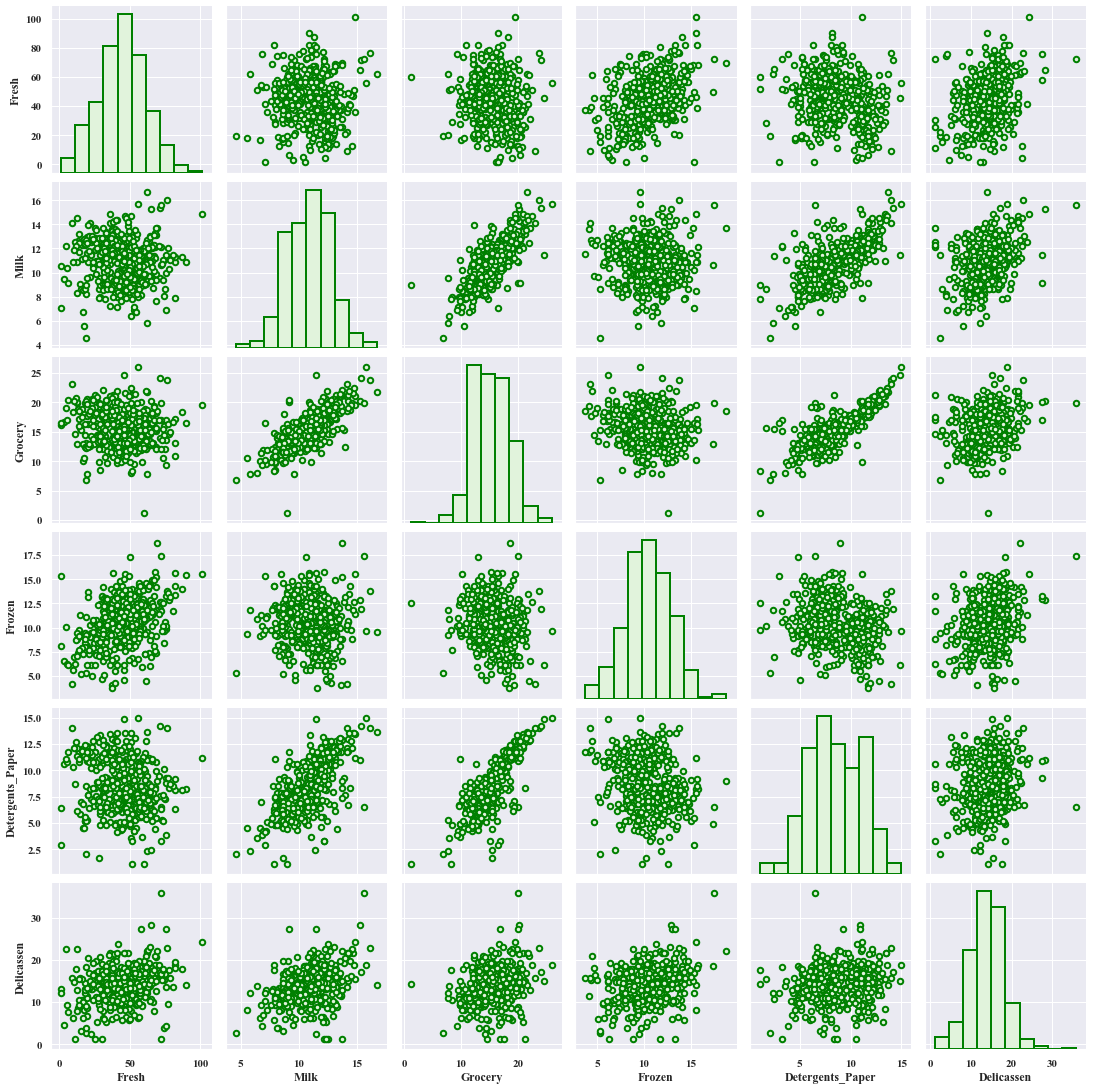

In [58]:
plt.figure()
sns.pairplot(spendings_boxcox,plot_kws=dict(s=30, edgecolor="g", linewidth=2),diag_kws=dict(edgecolor='g',linewidth=2))

We see the same correlation here, however, also an x amount of outliers can be detected. I would like to get rid of these now.

## Outlier detection
For the outlier detection I decided to write another notebook. This because I wanted to implement and apply several algorithms on the data. Please refer to [Customer outlier detection](http://localhost:8888/notebooks/Desktop/PYTHON_FOR_DATA_SCIENCE/Projects/Groceries%20Customer%20Segments/Outlier_Detection.ipynb)

In [59]:
#spendings_boxcox.to_pickle('DataFrames/spendings_boxcox') ## This is the input of the outlier program
#spendings_log.to_pickle('DataFrames/spendings_log') ## This is the input of the outlier program
#channels.to_pickle('DataFrames/channels')

In [60]:
spendings_boxcox_IQR=pd.read_pickle('DataFrames/spendings_boxcox_IQR')
spendings_boxcox_IsoFor=pd.read_pickle('DataFrames/spendings_boxcox_IsoFor')

spendings_log_IQR=pd.read_pickle('DataFrames/spendings_log_IQR')
spendings_log_IsoFor=pd.read_pickle('DataFrames/spendings_log_IsoFor')

### Log scaled data

# Customers original =  440
# Customers IQR log=  398
# Customers IsoFor log=  418


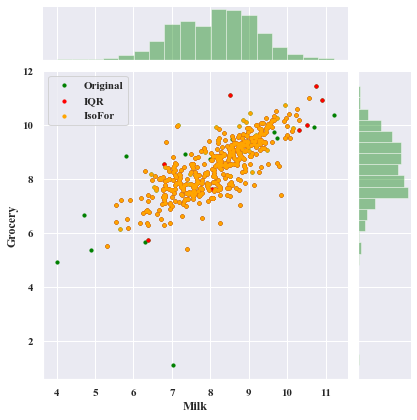

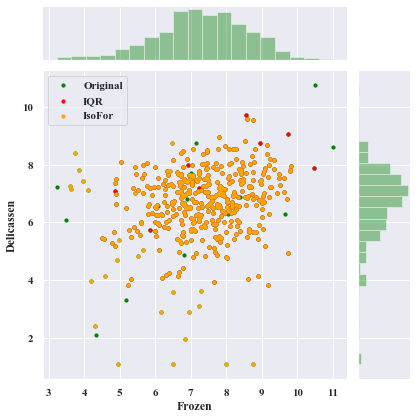

In [61]:
size=10
axs=sns.jointplot('Milk','Grocery',data=spendings_log,color='green',label='Original',alpha=1,s=size)
axs.ax_joint.scatter('Milk','Grocery',data=spendings_log_IQR,color='red',label='IQR',alpha=1,s=size)
axs.ax_joint.scatter('Milk','Grocery',data=spendings_log_IsoFor,color='orange',label='IsoFor',alpha=1,s=size)
axs.ax_joint.legend()
plt.savefig('Figures/Outlier_log_1.png',quality=50,format='png')

axs=sns.jointplot('Frozen','Delicassen',data=spendings_log,color='green',label='Original',alpha=1,s=size)
axs.ax_joint.scatter('Frozen','Delicassen',data=spendings_log_IQR,color='red',label='IQR',alpha=1,s=size)
axs.ax_joint.scatter('Frozen','Delicassen',data=spendings_log_IsoFor,color='orange',label='IsoFor',alpha=1,s=size)
axs.ax_joint.legend()
plt.savefig('Figures/Outlier_log_2.png',quality=50,format='png')

print('# Customers original = ',len(spendings_log))
print('# Customers IQR log= ',len(spendings_log_IQR))
print('# Customers IsoFor log= ',len(spendings_log_IsoFor))

### Boxcox scaled data

# Customers original =  440
# Customers IQR =  418
# Customers IsoFor =  416


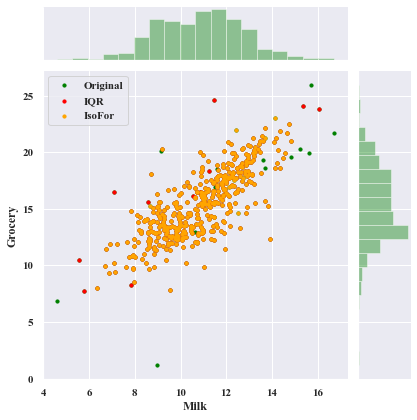

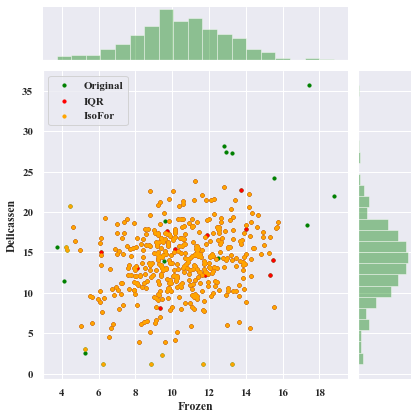

In [62]:
size=10
axs=sns.jointplot('Milk','Grocery',data=spendings_boxcox,color='green',label='Original',alpha=1,s=size)
axs.ax_joint.scatter('Milk','Grocery',data=spendings_boxcox_IQR,color='red',label='IQR',alpha=1,s=size)
axs.ax_joint.scatter('Milk','Grocery',data=spendings_boxcox_IsoFor,color='orange',label='IsoFor',alpha=1,s=size)
axs.ax_joint.legend()
plt.savefig('Figures/Outlier_boxcox_1.png',quality=50,format='png')

axs=sns.jointplot('Frozen','Delicassen',data=spendings_boxcox,color='green',label='Original',alpha=1,s=size)
axs.ax_joint.scatter('Frozen','Delicassen',data=spendings_boxcox_IQR,color='red',label='IQR',alpha=1,s=size)
axs.ax_joint.scatter('Frozen','Delicassen',data=spendings_boxcox_IsoFor,color='orange',label='IsoFor',alpha=1,s=size)
axs.ax_joint.legend()
plt.savefig('Figures/Outlier_boxcox_2.png',quality=50,format='png')
print('# Customers original = ',len(spendings_boxcox))
print('# Customers IQR = ',len(spendings_boxcox_IQR))
print('# Customers IsoFor = ',len(spendings_boxcox_IsoFor))

Now let's again see what the pairplots look like for the filtered data:

<Figure size 432x288 with 0 Axes>

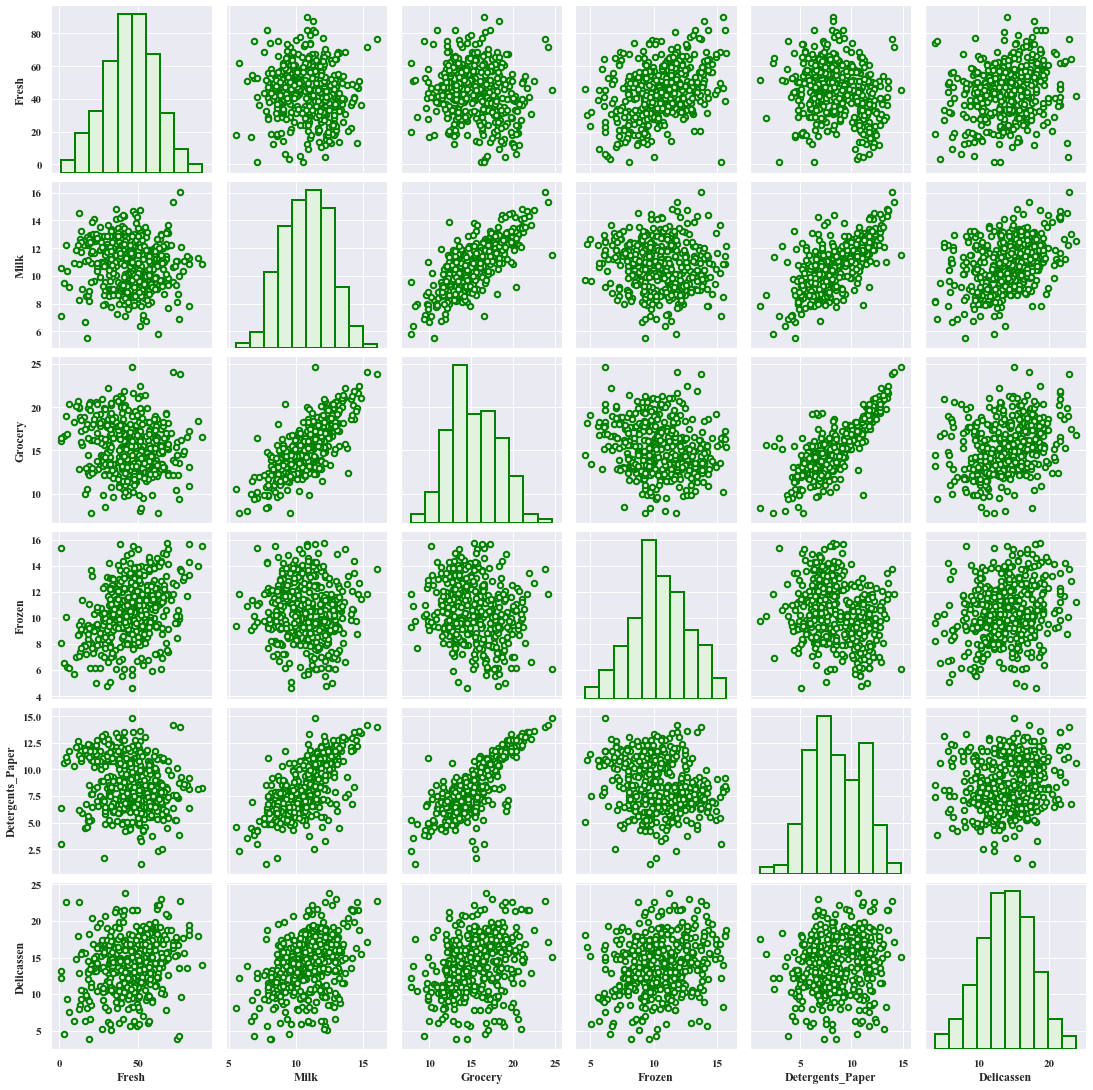

In [63]:
plt.figure()
sns.pairplot(spendings_boxcox_IQR,plot_kws=dict(s=30, edgecolor="g", linewidth=2),diag_kws=dict(edgecolor='g',linewidth=2))

This looks great, many of the outliers are indeed removed (figures look much fooler because the x and y lims are changed due to the absense of the outliers). Now we can proceed with this scaled and filtered dataset. 

## Principle component analysis

For the Principle Component Analysis (PCA) I decided to write another notebook. This is because I wanted to visualise it as appropriate as possible. Please refer to [Customer outlier detection](http://localhost:8888/notebooks/Desktop/PYTHON_FOR_DATA_SCIENCE/Projects/Groceries%20Customer%20Segments/Outlier_Detection.ipynb)

I have analyse the log and boxcox scaled data. Further, I was able to reduce both data-set from 6 to 3 and 2 dimensional, explaining 90+% of the variance in the log and boxcox data-sets respectively. These were the two most important figures:

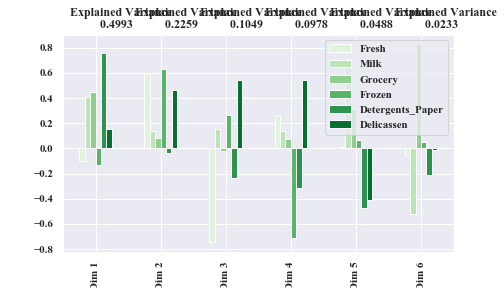

In [64]:
from IPython.display import Image
Image(filename='Figures/PCA_dist_log.png') 

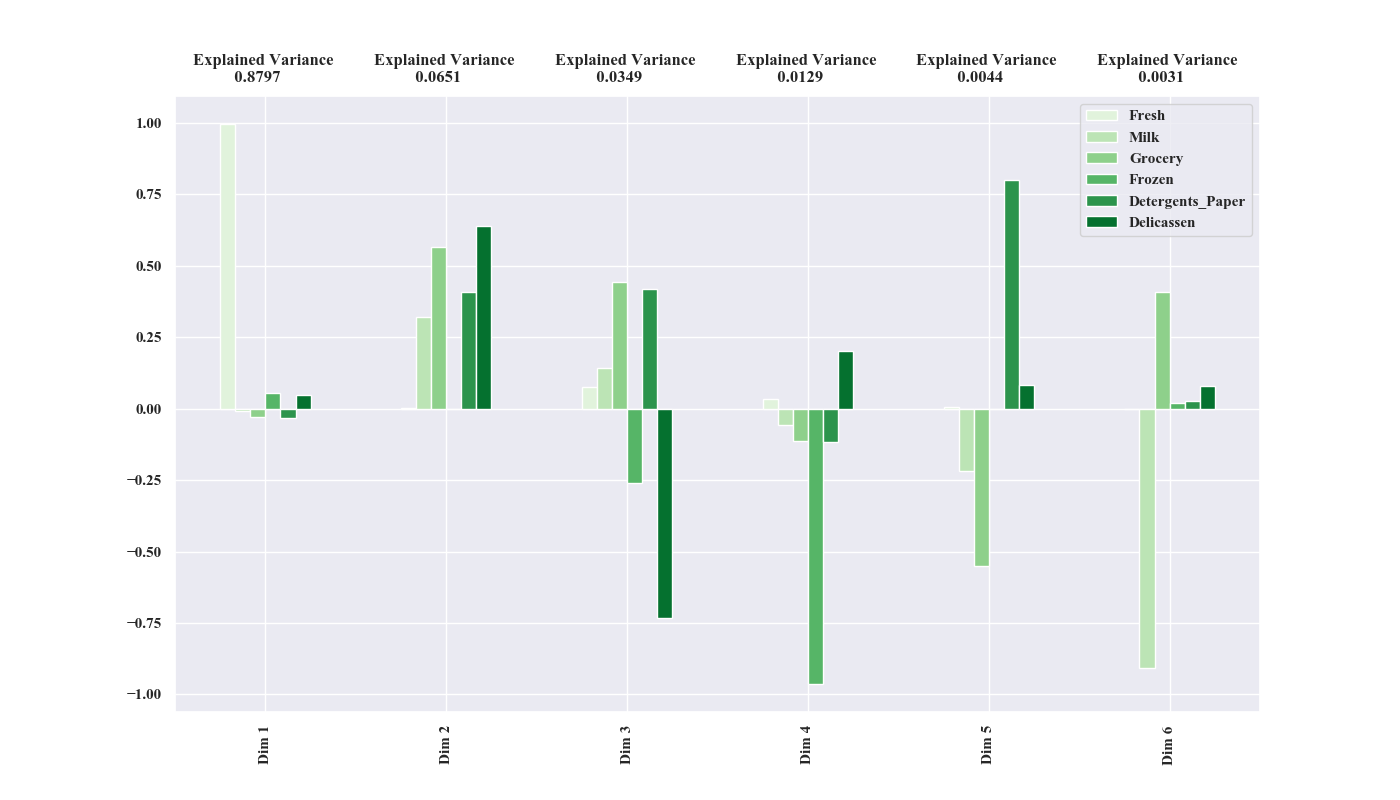

In [65]:
Image(filename='Figures/PCA_boxcox.png') 

Now, let's import the datasets again:

In [66]:
spendings_log_IQR_red2=pd.read_pickle('DataFrames/spendings_log_IQR_red2')
spendings_log_IQR_red3=pd.read_pickle('DataFrames/spendings_log_IQR_red3')
spendings_boxcox_IQR_red2=pd.read_pickle('DataFrames/spendings_boxcox_IQR_red2')

## Clustering
Now, we will start clustering and visualising the scaled, filtered, and reduced data. To do so, I would like to discover two different algorithms. Namely K-Means and Gaussian Mixture Model. The following can be claimed about both methods:
    
[K-Means clustering](https://en.wikipedia.org/wiki/K-means_clustering)
1. Easy to implement and very intuitive to interpret results.
2. Good for identifying hard clusters i.e. when a data point only belongs to one cluster over the others.

[Gaussian Mixture](https://towardsdatascience.com/gaussian-mixture-models-d13a5e915c8e)
1. Good for identifyinh soft clusters i.e. no clear border between clusters.
2. Does not bias the sizes of the clusters to have specific structures in the cluster that may or may not exist.

As I discussed earliers, we expect to see some overlap between the clusters. This is because restaurants, cafes, and hotels are quite similar in their buyings for example. For this reason I expect the Gaussian model to outperform the K-means. Let's check that out by first setting up the both models for the log scaled data with two dimensions:

### Log data - 2 dimensions

We do, of course, not know how many clusters we have. Therefore I loop over a set number of clusters and use the [Silhoutte coefficient](https://en.wikipedia.org/wiki/Silhouette_(clustering)) Silhouette refers to a method of interpretation and validation of consistency within clusters of data. The technique provides a succinct graphical representation of how well each object has been classified. The coeffcient is the mean of this distribution. 

In [67]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

N_clus=np.arange(2,10)
N_clus

array([2, 3, 4, 5, 6, 7, 8, 9])

Now, let's valuate both models on this range of clusters for the log scaled data:

In [68]:
KM_scores=[]
GM_scores=[]

for N in N_clus:
    KMmod = KMeans(n_clusters=N)
    GMmod = GaussianMixture(n_components=N)
    
    KMmod.fit(spendings_log_IQR_red2)
    GMmod.fit(spendings_log_IQR_red2)
    
    KM_log_red2_pred = KMmod.predict(spendings_log_IQR_red2)
    GM_log_red2_pred = GMmod.predict(spendings_log_IQR_red2)

    KM_scores.append(silhouette_score(spendings_log_IQR_red2,KM_log_red2_pred))
    GM_scores.append(silhouette_score(spendings_log_IQR_red2,GM_log_red2_pred))


In [69]:
N_clus_DF = pd.DataFrame(np.vstack((N_clus,KM_scores,GM_scores)).transpose(),columns=['N_clus','KMeans','GM'])
N_clus_DF

,N_clus,KMeans,GM
0,2.0,0.447158,0.446754
1,3.0,0.363986,0.353755
2,4.0,0.331151,0.305231
3,5.0,0.350795,0.313569
4,6.0,0.363650,0.321629
5,7.0,0.355209,0.270634
6,8.0,0.378637,0.320783
7,9.0,0.367516,0.322783


We see that for the log data, both algorithms define two clusters.

### Boxcox data - 2 dimensions
Now let's perform the same analysis with the boxcox data to see whether that influences the outcome of the algo's. I do not expect this to be the case since the kde's for both scalings visually look quite similar. However, for the sake of completeness, let's check this for the boxcox data as well.

In [70]:
KM_scores=[]
GM_scores=[]

for N in N_clus:
    KMmod = KMeans(n_clusters=N)
    GMmod = GaussianMixture(n_components=N)
    
    KMmod.fit(spendings_boxcox_IQR_red2)
    GMmod.fit(spendings_boxcox_IQR_red2)
    
    KM_boxcox_red2_pred = KMmod.predict(spendings_boxcox_IQR_red2)
    GM_boxcox_red2_pred = GMmod.predict(spendings_boxcox_IQR_red2)

    KM_scores.append(silhouette_score(spendings_boxcox_IQR_red2,KM_boxcox_red2_pred))
    GM_scores.append(silhouette_score(spendings_boxcox_IQR_red2,GM_boxcox_red2_pred))
N_clus_DF = pd.DataFrame(np.vstack((N_clus,KM_scores,GM_scores)).transpose(),columns=['N_clus','KMeans','GM'])
N_clus_DF

,N_clus,KMeans,GM
0,2.0,0.447158,0.446754
1,3.0,0.363986,0.359480
2,4.0,0.331340,0.301086
3,5.0,0.352799,0.306463
4,6.0,0.362761,0.320320
5,7.0,0.354912,0.336677
6,8.0,0.374848,0.307450
7,9.0,0.366433,0.308534


The same conclusion can be drawn here. So we can say that the type of scaling does not influence the outcome of the number of clusters. I guess it would be most interesting to see whether we can get to a more accurate solution if we incorporate 3 dimensions (90% explained variance) compared to the 2 dimensions (70% variance).

### Log data - 2 versus 3 dimenions
Let's start with evaluating the GM for the reasoning given earlier. After that I will also evaluate the performance of the KMeans algo on the 2 dim and 3 min data, but the results are expected to be less accurate.

In [71]:
GM_2_scores=[]
GM_3_scores=[]

for N in N_clus:
    GMmod_2 = GaussianMixture(n_components=N)
    GMmod_3 = GaussianMixture(n_components=N)
    
    GMmod_2.fit(spendings_log_IQR_red2)
    GMmod_3.fit(spendings_log_IQR_red3)
    
    GM_log_red2_pred = GMmod_2.predict(spendings_log_IQR_red2)
    GM_log_red3_pred = GMmod_3.predict(spendings_log_IQR_red3)

    GM_2_scores.append(silhouette_score(spendings_log_IQR_red2,GM_log_red2_pred))
    GM_3_scores.append(silhouette_score(spendings_log_IQR_red3,GM_log_red3_pred))
    
N_clus_DF = pd.DataFrame(np.vstack((N_clus,GM_2_scores,GM_3_scores)).transpose(),columns=['N_clus','70% Expl Var','90% Expl Var'])
N_clus_DF

,N_clus,70% Expl Var,90% Expl Var
0,2.0,0.446754,0.382832
1,3.0,0.352561,0.250038
2,4.0,0.316298,0.228088
3,5.0,0.334034,0.243328
4,6.0,0.288655,0.210229
5,7.0,0.336994,0.183718
6,8.0,0.317332,0.264222
7,9.0,0.304304,0.222628


We do still see the same outcome, however, with a 90% variance the certainty of the outcome decreases. This implies that the clusters would indeed overlap. Let's retrain both models with N=2 and plot them.

In [79]:
N=2

GMmod_2 = GaussianMixture(n_components=N)
GMmod_3 = GaussianMixture(n_components=N)

GMmod_2.fit(spendings_log_IQR_red2)
GMmod_3.fit(spendings_log_IQR_red3)

GM_log_red2_pred = GMmod_2.predict(spendings_log_IQR_red2)
GM_log_red3_pred = GMmod_3.predict(spendings_log_IQR_red3) ## With 3 min cluster 0 = cluster 1, why? No idea.
where_0 = np.where(GM_log_red3_pred == 0)
where_1 = np.where(GM_log_red3_pred == 1)

GM_log_red3_pred[where_0] = 1
GM_log_red3_pred[where_1] = 0

For plotting reasons I would like to convert the above into dataframes, also including the Channel feature of the original dataset (this is the true value). Note that to obtain the channel data, the same outliers are removed. These outliers were detected using the IQR algo. 

In [80]:
channels_log = pd.read_pickle('DataFrames/channels_log_IQR').reset_index()
channels_log.drop('index',axis=1,inplace=True)

# For 2 dim
GM_log_red2_pred = pd.DataFrame(GM_log_red2_pred, columns = ['Cluster'])
GM_log_2 = pd.concat([GM_log_red2_pred,channels_log,spendings_log_IQR_red2], axis = 1)

# For 3 dim
GM_log_red3_pred = pd.DataFrame(GM_log_red3_pred, columns = ['Cluster'])
GM_log_3 = pd.concat([GM_log_red3_pred,channels_log,spendings_log_IQR_red3], axis = 1)

,Cluster,Channel,Dim1,Dim2,Dim3
0,1,1,1.779322,-0.660449,-0.824685
1,1,1,1.882034,0.461741,0.276448
2,1,1,1.993507,1.247080,1.215652
3,0,0,-0.998581,1.369364,0.285448
4,0,1,0.993847,2.078314,0.261420
...,...,...,...,...,...
393,1,0,1.092404,-0.088703,-1.085899
394,0,0,-0.363319,2.871768,0.560018
395,0,0,-3.002061,1.868559,-0.008042
396,1,1,3.848267,0.144421,-0.913438


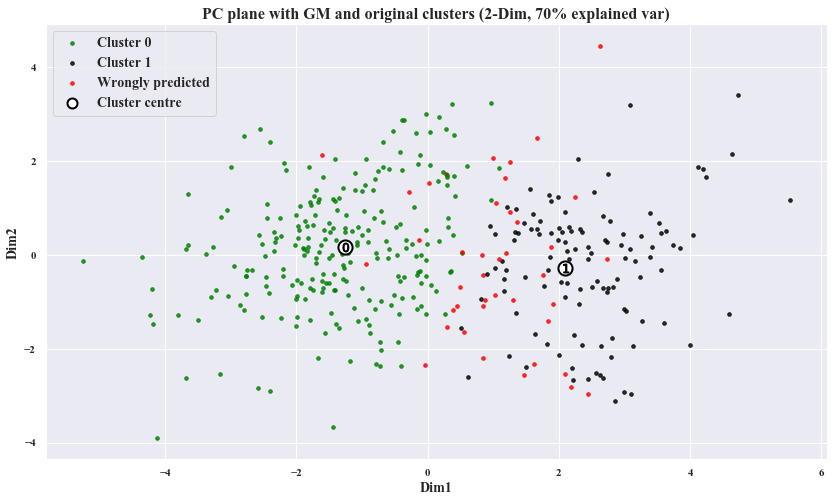

In [77]:
import math

fig, ax = plt.subplots(figsize = (14,8))
# Looping over points makes the plots more controlable at this moment
for i in range(0,len(GM_log_2)):
    if GM_log_2['Cluster'].iloc[i]==GM_log_2['Channel'].iloc[i]:
        if GM_log_2['Cluster'].iloc[i]==0:
            ax.scatter(x=GM_log_2['Dim1'].iloc[i],y=GM_log_2['Dim2'].iloc[i],c='green',s=13,alpha=0.8)
        else:
            ax.scatter(x=GM_log_2['Dim1'].iloc[i],y=GM_log_2['Dim2'].iloc[i],c='black',s=13,alpha=0.8)
    else:
         ax.scatter(x=GM_log_2['Dim1'].iloc[i],y=GM_log_2['Dim2'].iloc[i],c='red',s=13,alpha=0.8)
  

GMmod_2_centers = GMmod_2.means_
# Plot centers with indicators
for i, c in enumerate(GMmod_2_centers):
    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=200);
    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=80,c='black');
    
# Finsihing touch    
ax.scatter(x=math.nan,y=math.nan,c='green',s=13,label='Cluster 0',alpha=0.8)
ax.scatter(x=math.nan,y=math.nan,c='black',s=13,label='Cluster 1',alpha=0.8)
ax.scatter(x=math.nan,y=math.nan,c='red',s=13,label='Wrongly predicted',alpha=0.8)
ax.scatter(x = math.nan, y = math.nan, color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=100,label='Cluster centre')

       
ax.set_xlabel("Dim1", fontsize=14)
ax.set_ylabel("Dim2", fontsize=14)
ax.set_title("PC plane with GM and original clusters (2-Dim, 70% explained var)", fontsize=16);
ax.legend(fontsize=14)
plt.savefig('Figures/Clusters_2_GM.png',quality=50,format='png')


Let's also do that for the 3 dim case. This plotting was already done similarly in the PCA script.

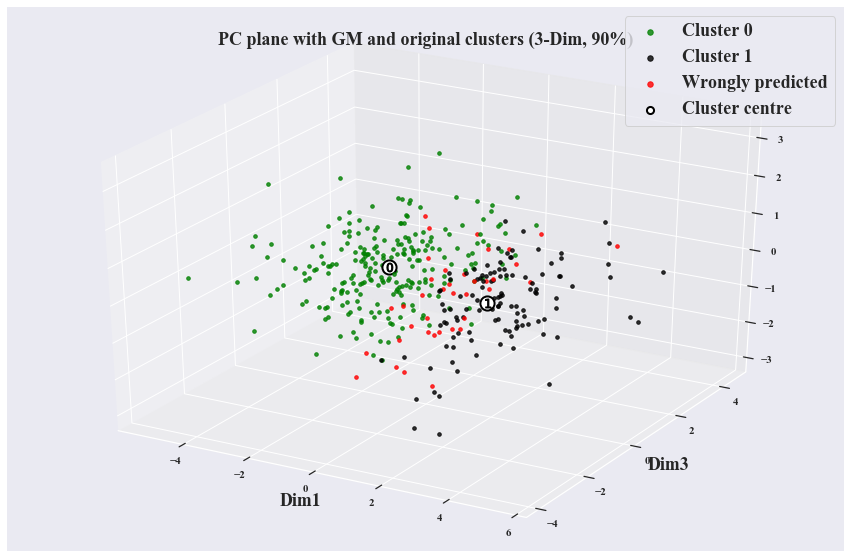

<Figure size 432x288 with 0 Axes>

In [81]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(GM_log_3)):
    if GM_log_3['Cluster'].iloc[i]==GM_log_3['Channel'].iloc[i]:
        if GM_log_3['Cluster'].iloc[i]==0:
            x=GM_log_3['Dim1'].iloc[i]
            y=GM_log_3['Dim2'].iloc[i]
            z=GM_log_3['Dim3'].iloc[i]
            ax.scatter(x, y, z, c='green', marker='o',s=13,alpha=0.8)     
        else:
            x=GM_log_3['Dim1'].iloc[i]
            y=GM_log_3['Dim2'].iloc[i]
            z=GM_log_3['Dim3'].iloc[i]
            ax.scatter(x, y, z, c='black', marker='o',s=13,alpha=0.8)    
    else:
        x=GM_log_3['Dim1'].iloc[i]
        y=GM_log_3['Dim2'].iloc[i]
        z=GM_log_3['Dim3'].iloc[i]
        ax.scatter(x, y, z, c='red', marker='o',s=13,alpha=0.8)
         #ax.scatter(x=GM_log_3['Dim1'].iloc[i],,,c='red',s=10)
  
GMmod_3_centers = GMmod_3.means_
# Plot centers with indicators
for i, c in enumerate(GMmod_3_centers):
    x=c[0]
    y=c[1]
    z=c[2]
    ax.scatter(x,y,z, color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=200);
    if i==1:
        ax.scatter(x,y,z, marker='$%d$'%(0), alpha = 1, s=80,c='black');
    else:
        ax.scatter(x,y,z, marker='$%d$'%(1), alpha = 1, s=80,c='black');


x=math.nan
y=math.nan
z=math.nan
ax.scatter(x,y,z,c='green',s=20,label='Cluster 0',alpha=0.8)
ax.scatter(x,y,z,c='black',s=20,label='Cluster 1',alpha=0.8)
ax.scatter(x,y,z,c='red',s=20,label='Wrongly predicted',alpha=0.8)
ax.scatter(x,y,z, color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=200,label='Cluster centre')

       
ax.set_xlabel("Dim1", fontsize=18)
ax.set_ylabel("Dim2", fontsize=18)
ax.set_ylabel("Dim3", fontsize=18)
ax.set_title("PC plane with GM and original clusters (3-Dim, 90%)", fontsize=18);
lgnd=ax.legend(fontsize=18)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[50]

# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
# plt.zlim([-3, 3])
plt.show()
plt.savefig('Figures/Clusters_3_GM.png',quality=50,format='png')


In [316]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

print(classification_report(GM_log_2['Channel'].values,GM_log_2['Cluster'].values))
print(classification_report(GM_log_3['Channel'].values,GM_log_3['Cluster'].values))

GM_log_2_f1=f1_score(GM_log_2['Channel'].values,GM_log_2['Cluster'].values)
GM_log_3_f1=f1_score(GM_log_3['Channel'].values,GM_log_3['Cluster'].values)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       274
           1       0.79      0.94      0.86       124

    accuracy                           0.90       398
   macro avg       0.88      0.91      0.89       398
weighted avg       0.91      0.90      0.90       398

              precision    recall  f1-score   support

           0       0.21      0.11      0.15       274
           1       0.03      0.06      0.04       124

    accuracy                           0.10       398
   macro avg       0.12      0.08      0.09       398
weighted avg       0.15      0.10      0.11       398



It can be seen that the data including 90% of the explained variance outperforms the 2 dim data. Of course this is as expected but interesting to verify anyway!

### Log data - KMeans versus Gaussian
Now, let's do the same analysis and plotting for the KMeans also to be able to compare the two models. As said, the Gaussian Mixture is expected to outperform KMeans because of the expected vague area between the two clusters (I can think of a hotel with a restaurant - or a large cafe which is quite similar to a restaurant).

In [317]:
N=2

KMmod_2 = KMeans(n_clusters=N)
KMmod_3 = KMeans(n_clusters=N)

KMmod_2.fit(spendings_log_IQR_red2)
KMmod_3.fit(spendings_log_IQR_red3)

KM_log_red2_pred = KMmod_2.predict(spendings_log_IQR_red2)
KM_log_red3_pred = KMmod_3.predict(spendings_log_IQR_red3)

Let's get it to dataframes again including the true channels.

In [318]:
KM_log_red2_pred = pd.DataFrame(KM_log_red2_pred, columns = ['Cluster'])
KM_log_2 = pd.concat([KM_log_red2_pred,channels_log,spendings_log_IQR_red2], axis = 1)

KM_log_red3_pred = pd.DataFrame(KM_log_red3_pred, columns = ['Cluster'])
KM_log_3 = pd.concat([KM_log_red3_pred,channels_log,spendings_log_IQR_red3], axis = 1)

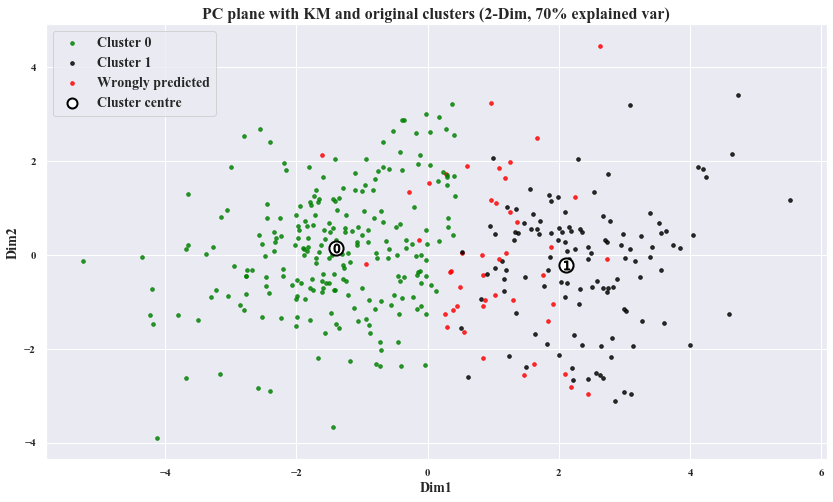

In [319]:
import math

fig, ax = plt.subplots(figsize = (14,8))

for i in range(0,len(KM_log_2)):
    if KM_log_2['Cluster'].iloc[i]==KM_log_2['Channel'].iloc[i]:
        if KM_log_2['Cluster'].iloc[i]==0:
            ax.scatter(x=KM_log_2['Dim1'].iloc[i],y=KM_log_2['Dim2'].iloc[i],c='green',s=13,alpha=0.8)
        else:
            ax.scatter(x=KM_log_2['Dim1'].iloc[i],y=KM_log_2['Dim2'].iloc[i],c='black',s=13,alpha=0.8)
    else:
         ax.scatter(x=KM_log_2['Dim1'].iloc[i],y=KM_log_2['Dim2'].iloc[i],c='red',s=13,alpha=0.8)
  

KMmod_2_centers = KMmod_2.cluster_centers_
# Plot centers with indicators
for i, c in enumerate(KMmod_2_centers):
    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=200);
    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=80,c='black');
    
    
ax.scatter(x=math.nan,y=math.nan,c='green',s=13,label='Cluster 0',alpha=0.8)
ax.scatter(x=math.nan,y=math.nan,c='black',s=13,label='Cluster 1',alpha=0.8)
ax.scatter(x=math.nan,y=math.nan,c='red',s=13,label='Wrongly predicted',alpha=0.8)
ax.scatter(x = math.nan, y = math.nan, color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=100,label='Cluster centre')

       
ax.set_xlabel("Dim1", fontsize=14)
ax.set_ylabel("Dim2", fontsize=14)
ax.set_title("PC plane with KM and original clusters (2-Dim, 70% explained var)", fontsize=16);
ax.legend(fontsize=14)

No visual differences with the GM can be noticed. That, of course, is a good sign!

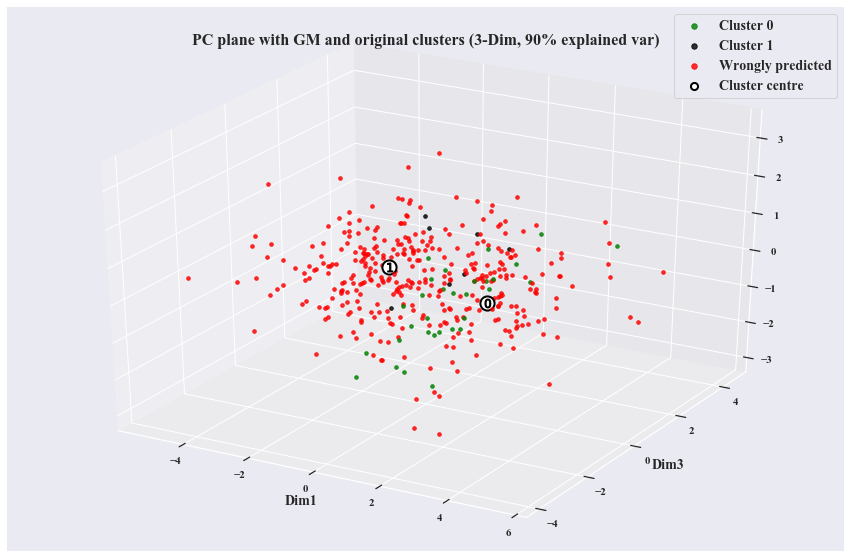

In [320]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(GM_log_2)):
    if GM_log_3['Cluster'].iloc[i]==GM_log_3['Channel'].iloc[i]:
        if GM_log_3['Cluster'].iloc[i]==0:
            x=GM_log_3['Dim1'].iloc[i]
            y=GM_log_3['Dim2'].iloc[i]
            z=GM_log_3['Dim3'].iloc[i]
            ax.scatter(x, y, z, c='green', marker='o',s=13,alpha=0.8)     
        else:
            x=GM_log_3['Dim1'].iloc[i]
            y=GM_log_3['Dim2'].iloc[i]
            z=GM_log_3['Dim3'].iloc[i]
            ax.scatter(x, y, z, c='black', marker='o',s=13,alpha=0.8)    
    else:
        x=GM_log_3['Dim1'].iloc[i]
        y=GM_log_3['Dim2'].iloc[i]
        z=GM_log_3['Dim3'].iloc[i]
        ax.scatter(x, y, z, c='red', marker='o',s=13,alpha=0.8)
         #ax.scatter(x=GM_log_3['Dim1'].iloc[i],,,c='red',s=10)
  
GMmod_3_centers = GMmod_3.means_
# Plot centers with indicators
for i, c in enumerate(GMmod_3_centers):
    x=c[0]
    y=c[1]
    z=c[2]
    ax.scatter(x,y,z, color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=200);
    if i==1:
        ax.scatter(x,y,z, marker='$%d$'%(0), alpha = 1, s=80,c='black');
    else:
        ax.scatter(x,y,z, marker='$%d$'%(1), alpha = 1, s=80,c='black');

    

x=math.nan
y=math.nan
z=math.nan
ax.scatter(x,y,z,c='green',s=20,label='Cluster 0',alpha=0.8)
ax.scatter(x,y,z,c='black',s=20,label='Cluster 1',alpha=0.8)
ax.scatter(x,y,z,c='red',s=20,label='Wrongly predicted',alpha=0.8)
ax.scatter(x,y,z, color = 'white', edgecolors = 'black',alpha = 1, linewidth = 2, marker = 'o', s=200,label='Cluster centre')

       
ax.set_xlabel("Dim1", fontsize=14)
ax.set_ylabel("Dim2", fontsize=14)
ax.set_ylabel("Dim3", fontsize=14)
ax.set_title("PC plane with GM and original clusters (3-Dim, 90% explained var)", fontsize=16);
lgnd=ax.legend(fontsize=14)

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]
lgnd.legendHandles[3]._sizes=[50]

# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
# plt.zlim([-3, 3])
plt.show()

In [321]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

print(classification_report(KM_log_2['Channel'].values,KM_log_2['Cluster'].values))
print(classification_report(KM_log_3['Channel'].values,KM_log_3['Cluster'].values))

KM_log_2_f1=f1_score(KM_log_2['Channel'].values,KM_log_2['Cluster'].values)
KM_log_3_f1=f1_score(KM_log_3['Channel'].values,KM_log_3['Cluster'].values)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       274
           1       0.75      0.95      0.84       124

    accuracy                           0.88       398
   macro avg       0.86      0.90      0.87       398
weighted avg       0.90      0.88      0.89       398

              precision    recall  f1-score   support

           0       0.25      0.14      0.18       274
           1       0.02      0.05      0.03       124

    accuracy                           0.11       398
   macro avg       0.14      0.10      0.11       398
weighted avg       0.18      0.11      0.13       398



Again, quite a good predictability of the outcomes can be done using the KMeans. Let's now compare them:

In [322]:
F1s = pd.DataFrame(np.array([GM_log_2_f1,GM_log_3_f1,KM_log_2_f1,KM_log_3_f1]).reshape(1,-1),columns=['GM 70%' ,'GM 90%','KM 70%' ,'KM 90%'])
F1s

,GM 70%,GM 90%,KM 70%,KM 90%
0,0.856089,0.037433,0.836879,0.032877


Here it can be seen that the Gaussian mixture model indeed performs better compared to the KMeans algorithm. Also, the more explained variance is included, the better the models predicts the clusters. Although all models perform relatively well for this problem, GM with an explained variance with 90% outperforms the rest which is as expected as explained earlier.

## Conclusions and implications
By means of an elaborate analysis I showed that the Gaussian mixture model is very much capable of identifing segments in a custumer annual spending data-set. A wholesaler could use this model to analyse the existing data, but also to analyse incomming data to predict the customer type and change the marketing, delivery or product offering based on this to increase the efficiency of the business.

Several techniques were used to accomplish this. First outliers were removed using the IQR algorithm. This algorithm was selected based on it performance (compared to three others) in combination with its simplicity. Afterwards, a principle components analyses was executed to reduce the dimensionality of this problem from 6 to 2 (70% explained variance) and 3 (90% explained variance). To execute this analyis, the data was scaled using the natural logarithm (this was chosen above the boxcox algo because I have affinity with this, the boxcox results were shown though).